In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)


Using TensorFlow backend.


In [139]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [17]:
import numpy as np

In [58]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [59]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')



In [60]:
print(x_train[22999])

[0. 1. 1. ... 0. 0. 0.]


In [135]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [136]:

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [137]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [141]:
history=model.fit(partial_x_train,partial_y_train,epochs=60, batch_size=512, )

Epoch 1/60
15000/15000 [==============================] - 1s 47us/step - loss: 0.0054 - acc: 0.9955
Epoch 2/60
15000/15000 [==============================] - 1s 47us/step - loss: 0.0113 - acc: 0.9864
Epoch 3/60
15000/15000 [==============================] - 1s 46us/step - loss: 0.0033 - acc: 0.9969
Epoch 4/60
15000/15000 [==============================] - 1s 47us/step - loss: 0.0108 - acc: 0.9872
Epoch 5/60
15000/15000 [==============================] - 1s 47us/step - loss: 0.0024 - acc: 0.9977
Epoch 6/60
15000/15000 [==============================] - 1s 47us/step - loss: 0.0021 - acc: 0.9980
Epoch 7/60
15000/15000 [==============================] - 1s 47us/step - loss: 0.0092 - acc: 0.9883
Epoch 8/60
15000/15000 [==============================] - 1s 47us/step - loss: 0.0017 - acc: 0.9983
Epoch 9/60
15000/15000 [==============================] - 1s 47us/step - loss: 0.0016 - acc: 0.9984
Epoch 10/60
15000/15000 [==============================] - 1s 47us/step - loss: 0.0082 - acc: 0.9907

In [118]:
results=model.evaluate(partial_x_train,partial_y_train)
results
model.predict(partial_x_train)



15000/15000 [==============================] - 1s 58us/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

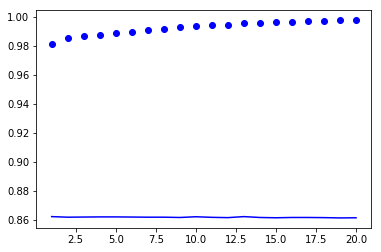

In [109]:
import matplotlib.pyplot as plt
history_dict=history.history
acc=history_dict['acc']
loss=history_dict['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',)
plt.plot(epochs,val_acc,'b',)
